# Numerical Exercises 12: Deep Neural Network

In [2]:
from MNIST_DNN import DNN
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

retrain = False

2024-06-01 19:51:22.172115: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-01 19:51:22.175209: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 19:51:22.277102: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 19:51:23.073422: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-01 19:51:31.876629: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In this first exercise I will implement a deep neural network to recognize handwritten digits and then tweak its parameters in order to improve the final result. To do this I used the provided code that already implements a CNN composed of:

- Layer of $400$ neurons, `relu` activation
- Layer of $100$ neurons, `relu` activation
- Dropout layer with rate $0.5$
- Layer of $10$ neurons, `softmax` activation

The dropout layer is force the network to "shutdown" some neurons during training, thus increasing the generalization ability; we can see this in action by looking at the training accuracy, which we expect to be lower than the validation accuracy. 
Furthermore since this is a classification problem, we will not use the same loss functions as in Lab11 but rather `categorical_crossentropy`.

The first parameter I had to tweak was the usual number of epochs $N_{Epoch}$. To do this I increased the value in the provided code arbitrarily up to $15$ and then observed the obtained predictions.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.9701 - loss: 0.0987

Test loss: 0.08550193905830383
Test accuracy: 0.9739999771118164


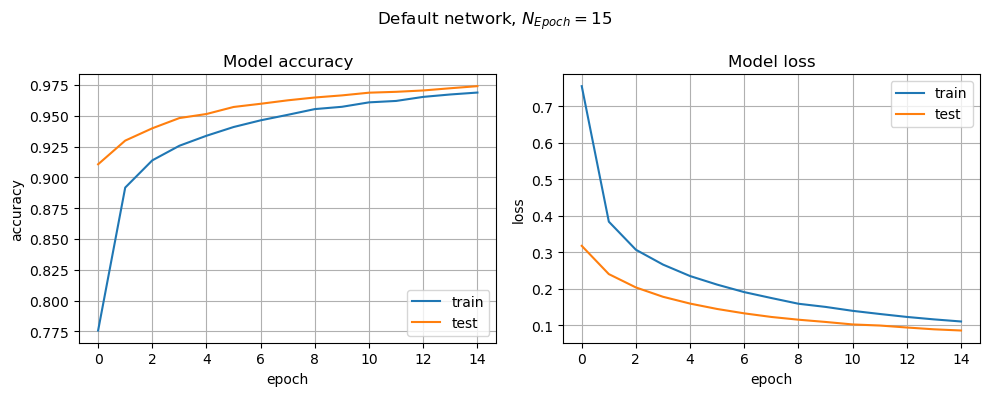

In [3]:
model_DNN = DNN(32, 15)
(score, history) = (None, None)

model_filename = './DNN.keras'
hist_filename = './hist.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

    (score, history) = model_DNN.train_DNN()
    model_DNN.save_model()

else:

    model_DNN.load_model()
    (score, history) = model_DNN.evaluate_DNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.suptitle(r"Default network, $N_{Epoch}=15$")
plt.tight_layout()
plt.show()

sgd_score = score                   # I will need this later

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


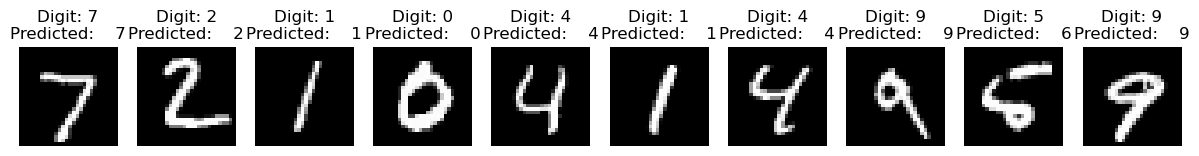

In [4]:
predictions = model_DNN.DNN_predict()
X_test = model_DNN.X_test.reshape(model_DNN.X_test.shape[0], model_DNN.img_rows, model_DNN.img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(model_DNN.Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

We can see that test and train accuracy only start to converge at the end of the training process: this indicates that the network has not yet completed the training, as we can see by some wrong predictions (for instance $5$ labelled as $6$). I can, anyway, use less epochs to test for the best optimizer, since it is not important for the DNN to be fully trained.

In order to find out which optimizer gives the best results, I trained the same network as before using three different optimizers, `rmsprop`, `adam` and `adadelta`. Anyway, when reading keras documentation, I noticed that `adadelta` was originally intended to be use with a different learning rate ($1.0$) then what is set by default: I then decided to also include the original implementation in my tests. All the networks have been trained for $8$ epochs.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...

Test loss: 0.17347578704357147
Test accuracy: 0.9764999747276306
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Completed: 1/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...

Test loss: 0.10543423146009445
Test accuracy: 0.9767000079154968
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Completed: 2/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...

Test loss: 1.128944754600525
Test accuracy: 0.8025000095367432
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Completed: 3/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...

Test loss: 0.0917450413107872
Test accuracy: 0.9797000288963318
313/313 ━━

/tmp/ipykernel_5634/161275109.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure_train.show()


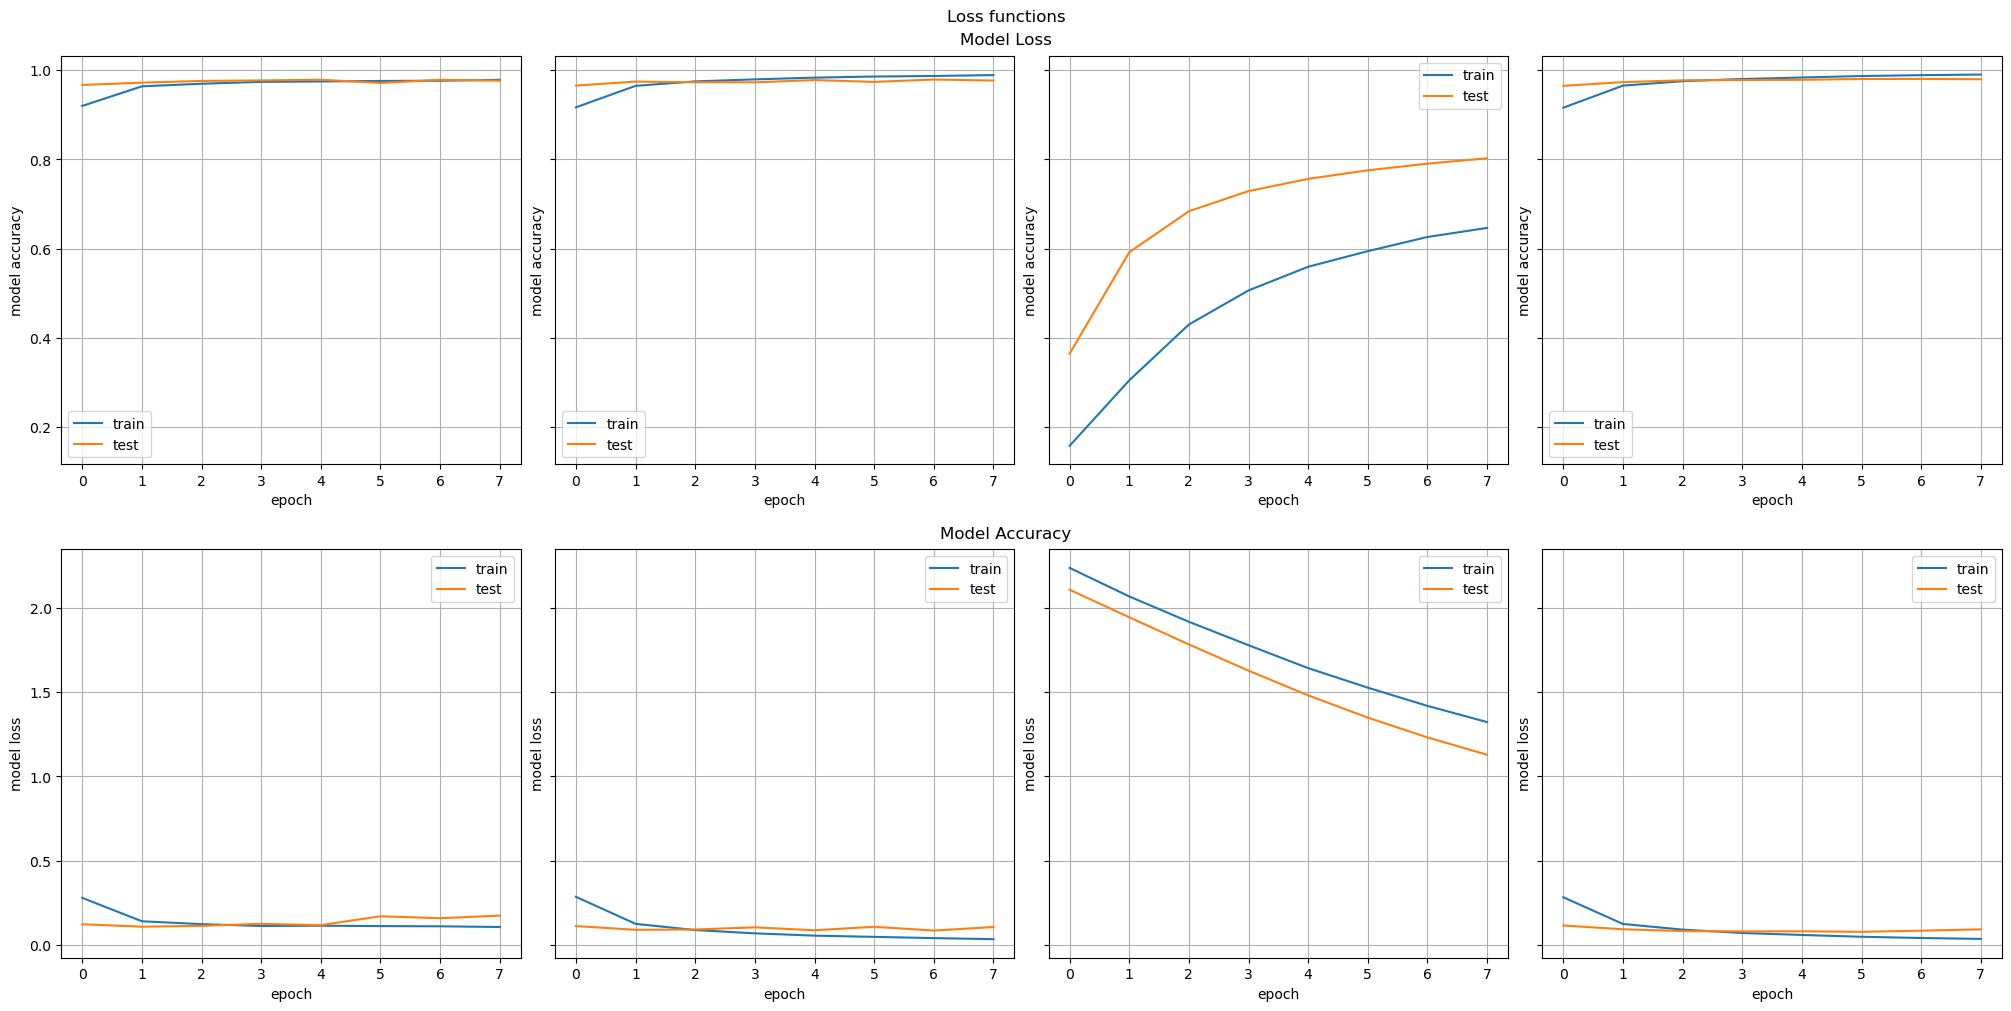

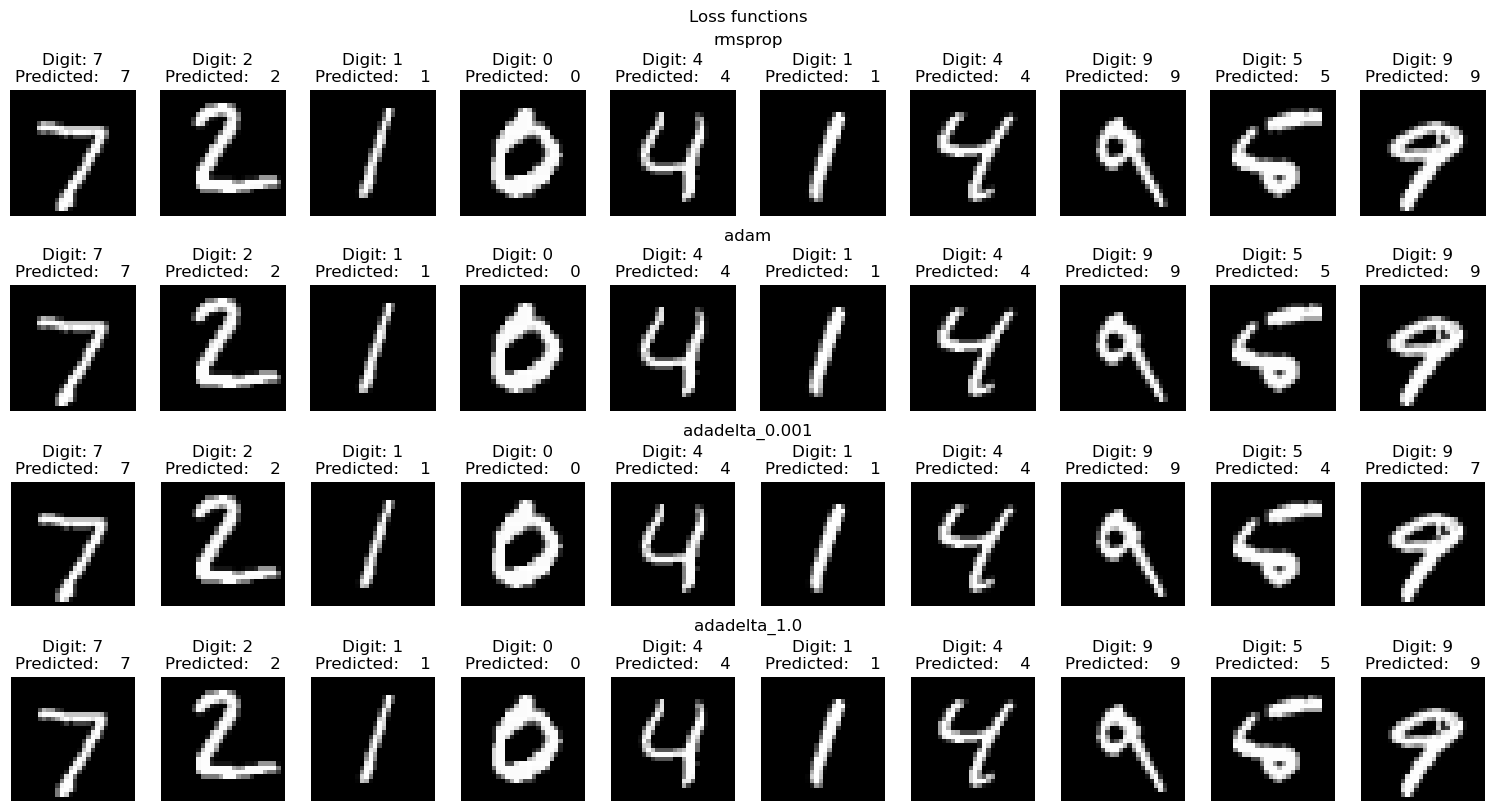

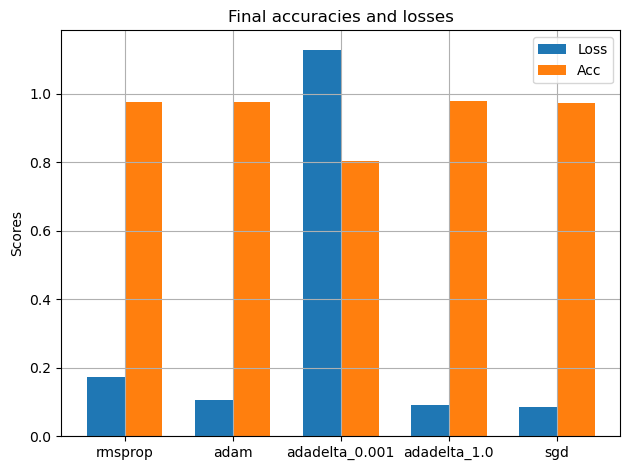

In [5]:
Optimizers = [RMSprop(), Adam(), Adadelta(), Adadelta(learning_rate = 1.0)] 
Optimizers_Str = ['rmsprop', 'adam', 'adadelta_0.001', 'adadelta_1.0'] 

path = './OptimizerCmp/'

Accuracies = []
Losses = []

Titles = ["Model Loss", "Model Accuracy"]

figure_train = plt.figure(constrained_layout=True)
figure_train.suptitle("Loss functions")
figure_train.set_size_inches(20, 10)

subfigs_train = figure_train.subfigures(nrows=2, ncols=1)
ax_train = []

for idx, subfig in enumerate(subfigs_train):

    subfig.suptitle(Titles[idx])
    ax_train.append(subfig.subplots(1, len(Optimizers), sharey = 'row'))

figure_pred = plt.figure(constrained_layout=True)
figure_pred.suptitle("Loss functions")
figure_pred.set_size_inches(15, 8)

subfigs_pred = figure_pred.subfigures(nrows=len(Optimizers), ncols=1)
ax_pred = []

for idx, subfig in enumerate(subfigs_pred):

    subfig.suptitle(Optimizers_Str[idx])
    ax_pred.append(subfig.subplots(1, 10, sharey = 'row'))

for idx, Optimizer in enumerate(Optimizers):

    model_filename = path + 'DNN_' + Optimizers_Str[idx] + ".keras"
    hist_filename = path + 'hist_' + Optimizers_Str[idx] + ".npy"

    model_DNN = DNN(32, 8, Optimizer, False)
    (score, history) = (None, None)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

        (score, history) = model_DNN.train_DNN()
        model_DNN.save_model(model_filename, hist_filename)

    else:

        model_DNN.load_model(model_filename, hist_filename)
        (score, history) = model_DNN.evaluate_DNN()

    ax_acc = ax_train[0][idx]
    ax_loss = ax_train[1][idx]

    # summarize history for accuracy
    ax_acc.plot(history.history['acc'])
    ax_acc.plot(history.history['val_acc'])
    ax_acc.set_ylabel('model accuracy')
    ax_acc.set_xlabel('epoch')
    ax_acc.legend(['train', 'test'], loc='best')
    ax_acc.grid(True)

    # summarize history for loss
    ax_loss.plot(history.history['loss'])
    ax_loss.plot(history.history['val_loss'])
    ax_loss.set_ylabel('model loss')
    ax_loss.set_xlabel('epoch')
    ax_loss.legend(['train', 'test'], loc='best')
    ax_loss.grid(True)

    predictions = model_DNN.DNN_predict()
    X_test = model_DNN.X_test.reshape(model_DNN.X_test.shape[0], model_DNN.img_rows, model_DNN.img_cols, 1)

    for i in range(10):    
        ax = ax_pred[idx][i]    
        ax.imshow(X_test[i, :, :, 0], cmap='gray')    
        ax.set_title("Digit: {}\nPredicted:    {}".format(np.argmax(model_DNN.Y_test[i]), np.argmax(predictions[i])))    
        ax.axis('off') 

    print("Completed: {}/{}".format(idx + 1, len(Optimizers)))

    Losses.append(score[0])
    Accuracies.append(score[1])

figure_train.show()

#add sgd data
Losses.append(sgd_score[0])
Accuracies.append(sgd_score[1])
Optimizers_Str.append('sgd')

x = np.arange(len(Optimizers_Str))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Losses, width, label='Loss')
rects2 = ax.bar(x + width/2, Accuracies, width, label='Acc')

# Add some text for Optimizers_Str, title and custom x-axis tick Optimizers_Str, etc.
ax.set_ylabel('Scores')
ax.set_title('Final accuracies and losses')
ax.set_xticks(x)
ax.set_xticklabels(Optimizers_Str)
ax.legend()
ax.grid(True)
fig.tight_layout()

plt.show()


Form all the plots we can see that `adadelta` with the lower learning rate yields far worse results than all the other optimizers. From the prediction themselves we can't make any further conclusion, so I am going to shift my attention to the losses and accuracies, which are reported in the bar chart to improve readability.

Form this latter plot, it is clear that `adadelta` with learning rate of $1.0$ gives the best results for accuracy and one of the best results for loss (only `sgd` is marginally better, but this was the first result I obtained with almost double the epochs). Considering this, I chose to use `adadelta` with learning rate of $1.0$ as the network optimizer.

I will now train the model for a larger number of epochs, $N_{Epoch}=30$, to have the the final results.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.9778 - loss: 0.1695

Test loss: 0.1326342225074768
Test accuracy: 0.9821000099182129


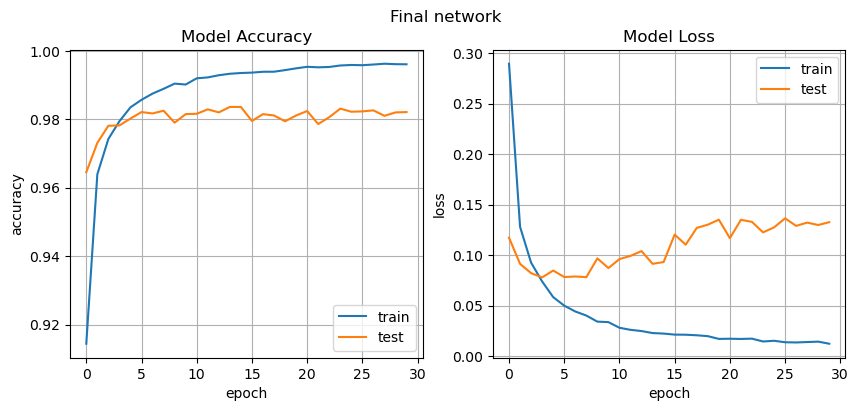

In [6]:
model_DNN = DNN(32, 30, Adadelta(learning_rate = 1.0))
(score, history) = (None, None)

model_filename = './DNN_final.keras'
hist_filename = './hist_final.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

    (score, history) = model_DNN.train_DNN()
    model_DNN.save_model(model_filename, hist_filename)

else:

    model_DNN.load_model(model_filename, hist_filename)
    (score, history) = model_DNN.evaluate_DNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.suptitle("Final network")
plt.show()

At the end of the training process we can see that the accuracy and loss have stabilized and they both settled on very good values (high accuracy, low loss), therefore suggesting a good choice for the network architecture.